# Introduction

## Enjeux de l'analyse des données textuelles

Dans le monde du *big data*, de plus en plus d'informations sont consommées et analysées sous forme de texte. Les sites Web, les réseaux sociaux, les e-mails et les chats sont devenus l'une des principales sources de données et d'informations. Il devient donc essentiel de comprendre comment traiter ce type de données textuelles non structurées. C'est l'apanage d'une branche appelée **traitement du langage naturel**, en anglais *Natural Language Processing* (NLP).

Le Traitement du Langage Naturel (NLP) est un domaine de l'Intelligence Artificielle qui donne la capacité aux machines de comprendre le langage humain. Il s'implémente en Python à l'aide de la bibliothèque NLTK (Natural Language Tool-Kit).

## Vocabulaire en Analyse des données textuelles

- *Document* : C'est l'équivalent d'une ligne d'enregistrement dans le dataset, laquelle contient des mots (phrases, paragraphes, ...).
- *Corpus* : C'est une collection de plusieurs documents ayant des caractéristiques similaires (par exemple, tous les tweets d'un même utilisateur).
- *Tokenization* : Processus de décomposition d'un flux de contenu textuel en mots, termes, symboles et autres éléments significatifs. Autrement dit, ce processus consiste à décomposer un paragraphe de texte en éléments plus petits tels que des mots ou des phrases. Un *Token* est donc une entité unique qui constitue la base d'une phrase ou d'un paragraphe.
- *Stemming* : Processus de normalisation linguistique permettant de réduire les mots à leur racine ou à supprimer les affixes dérivatifs. En d'autres termes, il s'agit de convertir les mots en ne gardant que leurs racines (mot de base). Par exemple : La racine des mots "aide", "aider", "aidant", "aidais", "aides" et "aidée" est "aid". Cette technique permet de réduire le nombre total des mots rédondants (signification identique) dans le corpus en coupant l'affixe (groupe des dernières lettres du mot). Après stemming, les mots restants sont convertis en miniscule.
- *Lemmatization* : Processus de normalisation linguistique semblable au Stemming, mais produit un mot-racine appartenant au vocabulaire de la langue concernée. Dans l'exemple précédent, la racine devient "aide". La lemmatisation est donc plus sophistiquée que le stemming, car les mots-racines générés ont un sens linguistiquement correct.
- *Nettoyage du texte* : Supprimer les signes de ponctuation, les abréviations, les hashtags, les caractères spéciaux et les mots-vides (ex: dans, et, le). Les mots-vides (*stopwords*) sont des tokens qui sont considérés comme du bruit dans le texte (ex: in, and, the, ...), i.e. des mots qui n'ont aucun enjeu dans l'analyse ou dans la prédiction. Ils varient en fonction de la langue dans laquelle les données ont été collectées (français ou anglais ?). La librairie NLTK donne la possibilité d'utiliser le dictionnaire d'une langue donnée afin de gérer efficacement les *stopwords*.

# Text mining

Le **text mining** est une partie de la *Data Analysis* qui permet d'explorer et d'analyser de grandes quantités de données textuelles non structurées pour des fins notamment d'analyse des sentiments, de détection des émotions ou de classification automatique. Nous allons travailler sur les communiqués de la BBC afin de parvenir à prédire l'appartenance d'un article de presse à une catégorie donnée.

## Importation des fichiers texte

In [1]:
# Installation et Chargement des bibliotheques d'analyse des donnees textuelles

#!pip install nltk

import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os                                                         # pour avoir acces aux repertoires de stockage interne
import nltk                                                       # pour les operations de text mining
#nltk.download("punkt")
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [2]:
# Importation des donnees textuelles (Articles de BBC News)

path = "E:/Rédaction d'articles/Sentimental Analysis/Methodology/Notebook/Text classification/BBC_dataset/News Articles"
folder_business = os.path.join(path, "business")
folder_entertainment = os.path.join(path, "entertainment")
folder_politics = os.path.join(path, "politics")
folder_sport = os.path.join(path, "sport")
folder_tech = os.path.join(path, "tech")                                # Specification des repertoires de travail

data_business = []
for root, folders, files in os.walk(folder_business):
    for file in files:
        path = os.path.join(root, file)
        with open(path, encoding = "utf8", errors = 'ignore') as inf:
            data_business.append(inf.read())                            # corpus 1 : Business

data_entertainment = []
for root, folders, files in os.walk(folder_entertainment):
    for file in files:
        path = os.path.join(root, file)
        with open(path, encoding = "utf8", errors = 'ignore') as inf:
            data_entertainment.append(inf.read())                       # corpus 2 : Entertainment

data_politics = []
for root, folders, files in os.walk(folder_politics):
    for file in files:
        path = os.path.join(root, file)
        with open(path, encoding = "utf8", errors = 'ignore') as inf:
            data_politics.append(inf.read())                            # corpus 3 : Politics

            
data_sport = []
for root, folders, files in os.walk(folder_sport):
    for file in files:
        path = os.path.join(root, file)
        with open(path, encoding = "utf8", errors = 'ignore') as inf:
            data_sport.append(inf.read())                               # corpus 4 : Sport
            
data_tech = []
for root, folders, files in os.walk(folder_tech):
    for file in files:
        path = os.path.join(root, file)
        with open(path, encoding = "utf8", errors = 'ignore') as inf:
            data_tech.append(inf.read())                                # corpus 5 : Tech

In [3]:
# Conversion des donnees importees en format dataframe

business = pd.DataFrame(data_business, columns = ["Text"])
business["Categorie"] = "business"

entertainment = pd.DataFrame(data_entertainment, columns = ["Text"])
entertainment["Categorie"] = "entertainment"

politics = pd.DataFrame(data_politics, columns = ["Text"])
politics["Categorie"] = "politics"

sport = pd.DataFrame(data_sport, columns = ["Text"])
sport["Categorie"] = "sport"

tech = pd.DataFrame(data_tech, columns = ["Text"])
tech["Categorie"] = "tech"

text_data = pd.concat([business, entertainment, politics, sport, tech], axis = 0)
text_data.reset_index(inplace = True)
text_data.drop("index", axis = 1, inplace = True)
text_data.info()
text_data.sample(10, random_state = 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2225 non-null   object
 1   Categorie  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


,Text,Categorie
1329,Call for Kenteris to be cleared\n\nKostas Kent...,sport
91,Iranian MPs threaten mobile deal\n\nTurkey's b...,business
733,Farrell due to make US TV debut\n\nActor Colin...,entertainment
1430,Parry relishes Anfield challenge\n\nBBC Sport ...,sport
784,The Producers scoops stage awards\n\nThe Produ...,entertainment
1849,Warnings about junk mail deluge\n\nThe amount ...,tech
2131,Microsoft makes anti-piracy move\n\nMicrosoft ...,tech
1817,Soderling wins tense Milan final\n\nFifth seed...,sport
462,US economy still growing says Fed\n\nMost area...,business
1534,McClaren hails Boro's Uefa spirit\n\nMiddlesbr...,sport


In [4]:
# Recuperation d'un article isole dans le dataset

display(len(text_data["Text"][1000]))
print(text_data["Text"][1000])

3244

Muslim police stops 'more likely'

UK Muslims should accept that people of Islamic appearance are more likely to be stopped and searched by police, a Home Office minister has said.

Hazel Blears said innocent Muslims would be targeted because of the search for Islamic extremists. Qualifications for religious leaders to enter the UK could also be made tougher, she told a Commons inquiry. Her comments have been described as "irresponsible" and "outrageous" by the Islamic Human Rights Commission (IHRC).

"The threat is most likely to come from those people associated with an extreme form of Islam, or who are falsely hiding behind Islam," the Salford MP told the Commons home affairs committee.

"It means that some of our counter-terrorism powers will be disproportionately experienced by the Muslim community." It was a reality that should be recognised, she said. "If a threat is from a particular place then our action is going to be targeted at that area," she added. On ministers of religio

In [5]:
# Equilibre des classes

text_data["Categorie"].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: Categorie, dtype: int64

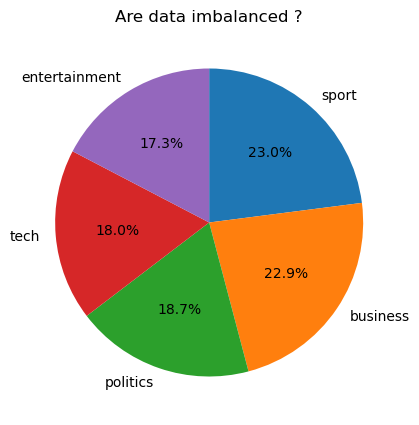

In [6]:
data_pieplot = pd.DataFrame({"Proportions":text_data["Categorie"].value_counts(normalize = True, ascending = False)})

plt.figure(figsize = (5,5))
#plt.style.use("ggplot")
plt.pie(data_pieplot["Proportions"], labels = data_pieplot.index, autopct = "%2.1f%%",
        counterclock = False, startangle = 90)
plt.title("Are data imbalanced ?");

## Data preprocessing

In [7]:
# Pre-traitement des donnees textuelles

from nltk.stem import PorterStemmer                 # pour le stemming
from nltk.stem.wordnet import WordNetLemmatizer     # pour la lemmatization
import re, string                                   # pour la suppression des caracteres speciaux
from nltk.tokenize import word_tokenize             # pour la tokenization
from nltk.corpus import stopwords                   # pour le nettoyage des mots-vides

stop_words = stopwords.words("english")             # definition de la liste des mots-vides partant du dictionnaire d'une langue
stop_words.extend(["say", "mr", "us"])              # extension de la liste des mots-vides afin de prendre en compte les mots couramment utilises dans les news de la BBC
display(string.punctuation)                         # liste des signes de ponctuation et caracteres speciaux
ps = PorterStemmer()                                # instanciation du stemmer
lem = WordNetLemmatizer()                           # instanciation du lemmatizer

for index, row in text_data.iterrows():
    cleaned_data = []
    sentence = row["Text"]
    sentence = re.sub(r'[^\w\s]', '', sentence)                             # Suppression des signes de ponctuation et caracteres speciaux
    sentence = re.sub('(@[A-Za-z0-9_]+)','', sentence)                      # Suppression des hashtags
    sentence = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', sentence)        # Suppression des hyperliens
    words = word_tokenize(sentence)                                         # Tokenization des contenus textuels en mots
    words = [w.lower() for w in words if w.lower() not in stop_words]       # Nettoyage des mots-vides
    for w in words:
        cleaned_data.append(lem.lemmatize(w, "v"))                          # Normalisation linguistique (lemmatization)
    text_data.loc[index, "Text"] = cleaned_data

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
# Recuperation d'un article isole dans le dataset apres nettoyage

display(len(text_data["Text"][1000]))
print(text_data["Text"][1000])

290

['muslim', 'police', 'stop', 'likely', 'uk', 'muslims', 'accept', 'people', 'islamic', 'appearance', 'likely', 'stop', 'search', 'police', 'home', 'office', 'minister', 'say', 'hazel', 'blear', 'say', 'innocent', 'muslims', 'would', 'target', 'search', 'islamic', 'extremists', 'qualifications', 'religious', 'leaders', 'enter', 'uk', 'could', 'also', 'make', 'tougher', 'tell', 'commons', 'inquiry', 'comment', 'describe', 'irresponsible', 'outrageous', 'islamic', 'human', 'right', 'commission', 'ihrc', 'threat', 'likely', 'come', 'people', 'associate', 'extreme', 'form', 'islam', 'falsely', 'hide', 'behind', 'islam', 'salford', 'mp', 'tell', 'commons', 'home', 'affairs', 'committee', 'mean', 'counterterrorism', 'power', 'disproportionately', 'experience', 'muslim', 'community', 'reality', 'recognise', 'say', 'threat', 'particular', 'place', 'action', 'go', 'target', 'area', 'add', 'minister', 'religions', 'imams', 'say', 'faith', 'group', 'would', 'ask', 'qualifications', 'skills', 'civi

## Distribution des fréquences

Il est question ici de compter les fréquences d'apparition des mots afin de parvenir à identifier, par exemple, le(s) mot(s) le(s) plus employé(s) dans le dataset.

In [9]:
# Tableau des frequences

from nltk.probability import FreqDist

fdist_business = []
business_data = text_data[text_data["Categorie"] == "business"]
for i in np.arange(business_data.index[0],business_data.index[0]+len(business_data)-1):
    fdist_business.append(FreqDist(business_data["Text"][i]))
business_freq = pd.DataFrame(fdist_business).sum(axis = 0)
business_freq.sort_values(ascending=False, inplace=True)                    # les mots les plus frequents en Business
business_freq = pd.DataFrame(business_freq, columns = ["Frequency"])
business_freq.reset_index(inplace = True)
business_freq.rename(columns = {"index":"Words"}, inplace = True)

fdist_politics = []
politics_data = text_data[text_data["Categorie"] == "politics"]
for i in np.arange(politics_data.index[0],politics_data.index[0]+len(politics_data)-1):
    fdist_politics.append(FreqDist(politics_data["Text"][i]))
politics_freq = pd.DataFrame(fdist_politics).sum(axis = 0)
politics_freq.sort_values(ascending=False, inplace=True)                    # les mots les plus frequents en Politique
politics_freq = pd.DataFrame(politics_freq, columns = ["Frequency"])
politics_freq.reset_index(inplace = True)
politics_freq.rename(columns = {"index":"Words"}, inplace = True)

fdist_tech = []
tech_data = text_data[text_data["Categorie"] == "tech"]
for i in np.arange(tech_data.index[0],tech_data.index[0]+len(tech_data)-1):
    fdist_tech.append(FreqDist(tech_data["Text"][i]))
tech_freq = pd.DataFrame(fdist_tech).sum(axis = 0)
tech_freq.sort_values(ascending=False, inplace=True)                        # les mots les plus frequents en Technologie
tech_freq = pd.DataFrame(tech_freq, columns = ["Frequency"])
tech_freq.reset_index(inplace = True)
tech_freq.rename(columns = {"index":"Words"}, inplace = True)

fdist_entertainment = []
entertainment_data = text_data[text_data["Categorie"] == "entertainment"]
for i in np.arange(entertainment_data.index[0],entertainment_data.index[0]+len(entertainment_data)-1):
    fdist_entertainment.append(FreqDist(entertainment_data["Text"][i]))
entertainment_freq = pd.DataFrame(fdist_entertainment).sum(axis = 0)
entertainment_freq.sort_values(ascending=False, inplace=True)               # les mots les plus frequents en Divertissement
entertainment_freq = pd.DataFrame(entertainment_freq, columns = ["Frequency"])
entertainment_freq.reset_index(inplace = True)
entertainment_freq.rename(columns = {"index":"Words"}, inplace = True)

fdist_sport = []
sport_data = text_data[text_data["Categorie"] == "sport"]
for i in np.arange(sport_data.index[0],sport_data.index[0]+len(sport_data)-1):
    fdist_sport.append(FreqDist(sport_data["Text"][i]))
sport_freq = pd.DataFrame(fdist_sport).sum(axis = 0)
sport_freq.sort_values(ascending=False, inplace=True)                       # les mots les plus frequents en Sport
sport_freq = pd.DataFrame(sport_freq, columns = ["Frequency"])
sport_freq.reset_index(inplace = True)
sport_freq.rename(columns = {"index":"Words"}, inplace = True)

print("Top 5 :", fdist_business[100].most_common(5))        # les 5 mots les plus utilises dans l'article d'indice 100
print("Growth :", fdist_business[100].get("growth"))        # frequence d'un mot specifique dans l'article d'indice 100

Top 5 : [('bank', 7), ('economy', 6), ('say', 6), ('australia', 4), ('rate', 4)]
Growth : 3


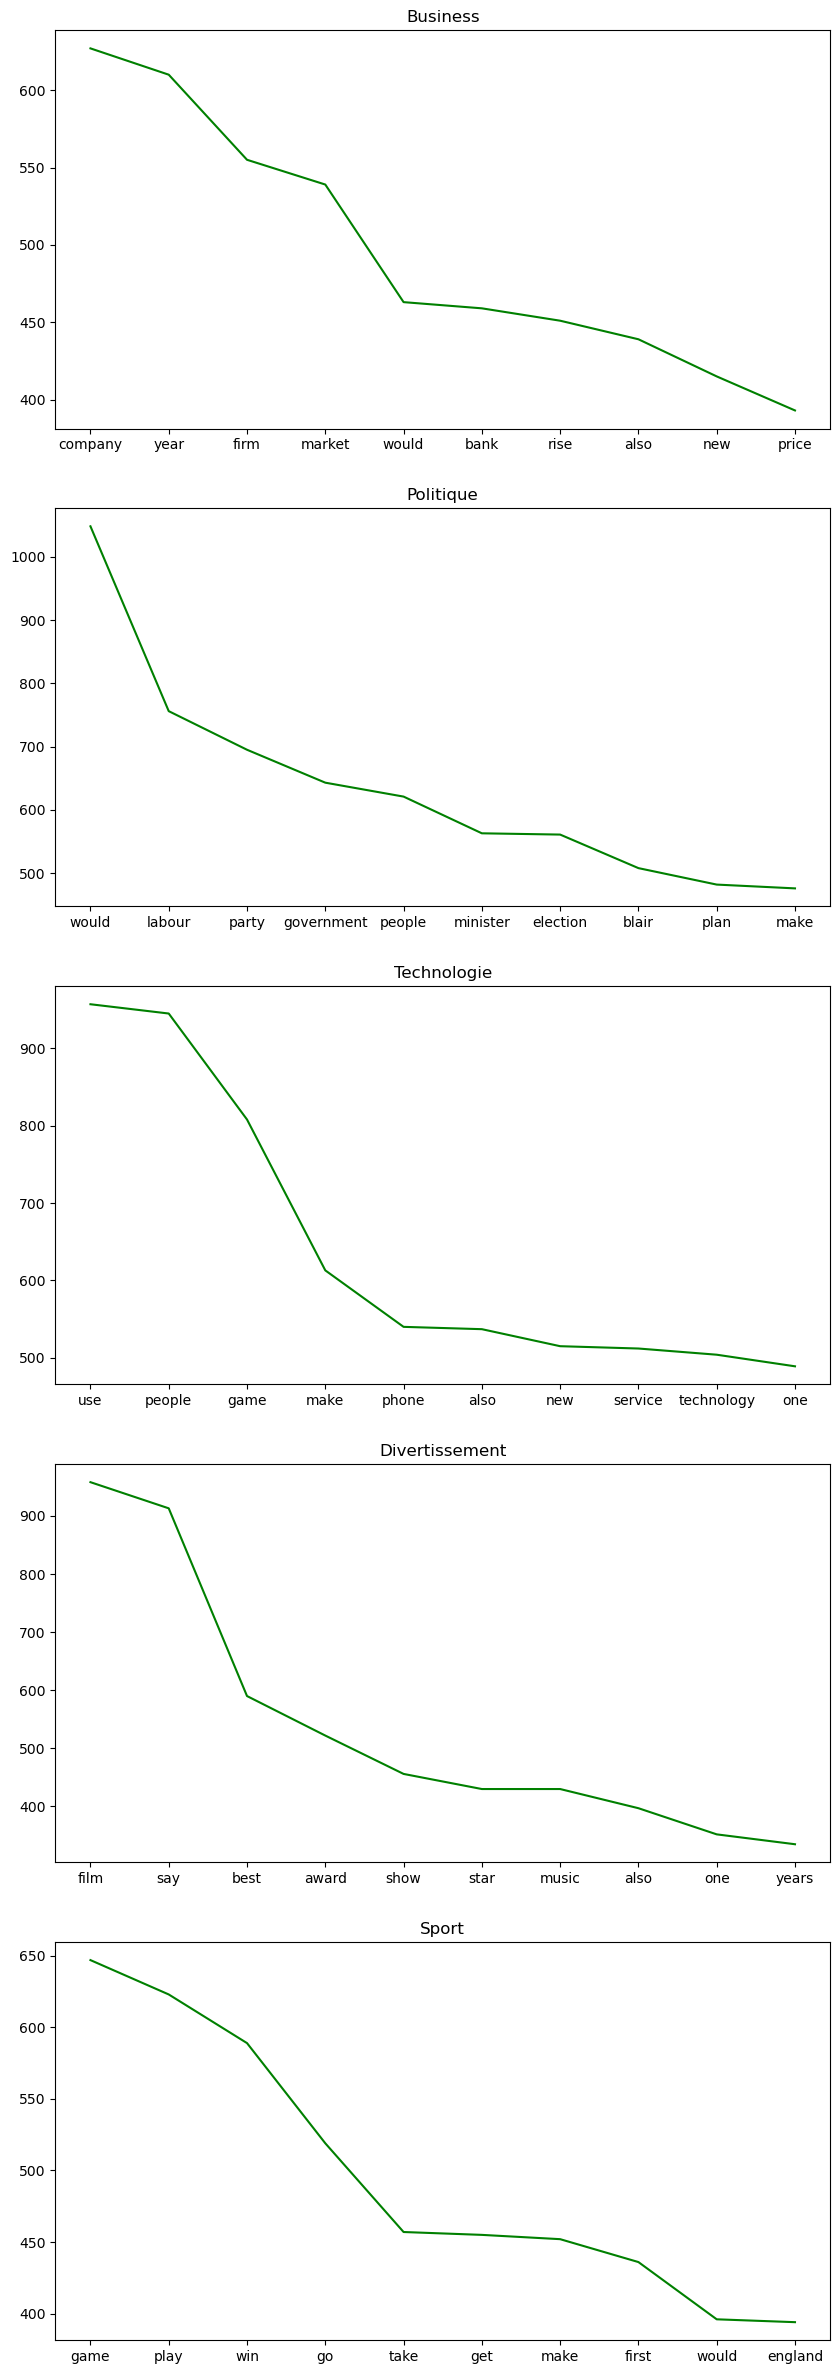

In [10]:
# Graphique des frequences

from matplotlib import pyplot as plt

fig, plan = plt.subplots(nrows = 5, ncols = 1, figsize = [10,30])

def freq_plot (x, y, index, title):
    plan[index].plot(x, y, color = "green")
    plan[index].set_title(str(title));

freq_plot(x=business_freq["Words"][1:11], y=business_freq["Frequency"][1:11], index=0, title="Business")
freq_plot(x=politics_freq["Words"][1:11], y=politics_freq["Frequency"][1:11], index=1, title="Politique")
freq_plot(x=tech_freq["Words"][1:11], y=tech_freq["Frequency"][1:11], index=2, title="Technologie")
freq_plot(x=entertainment_freq["Words"][:10], y=entertainment_freq["Frequency"][:10], index=3, title="Divertissement")
freq_plot(x=sport_freq["Words"][1:11], y=sport_freq["Frequency"][1:11], index=4, title="Sport")

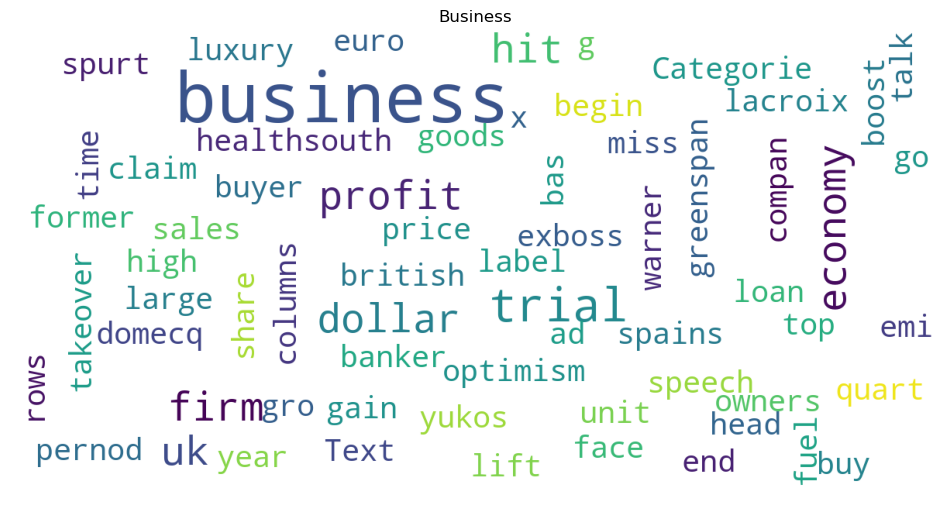

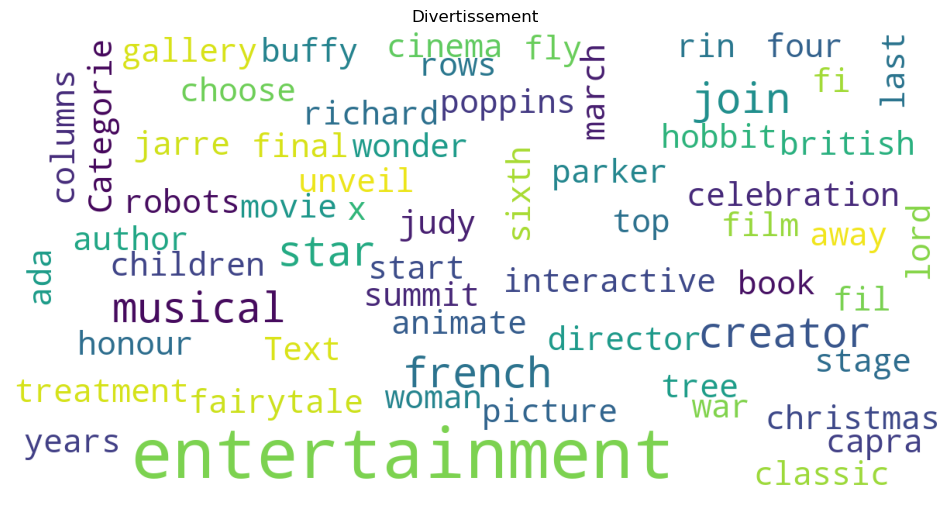

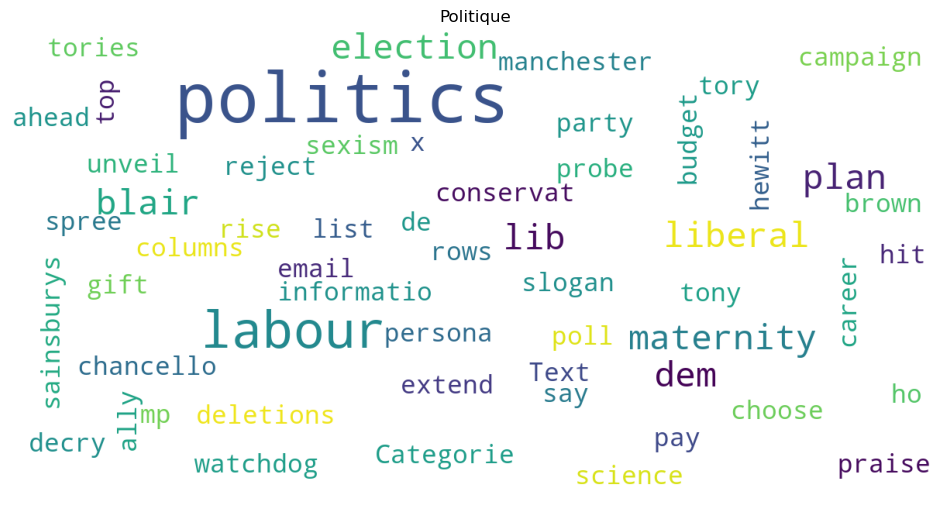

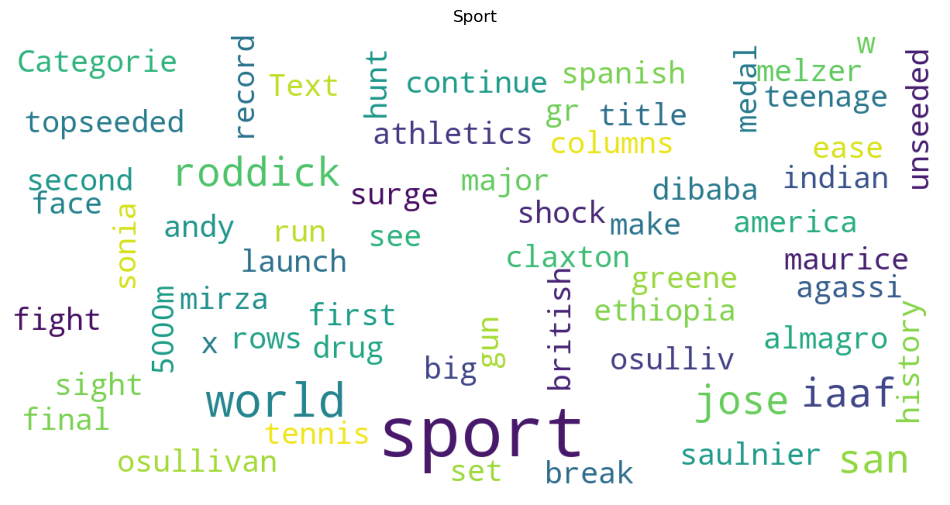

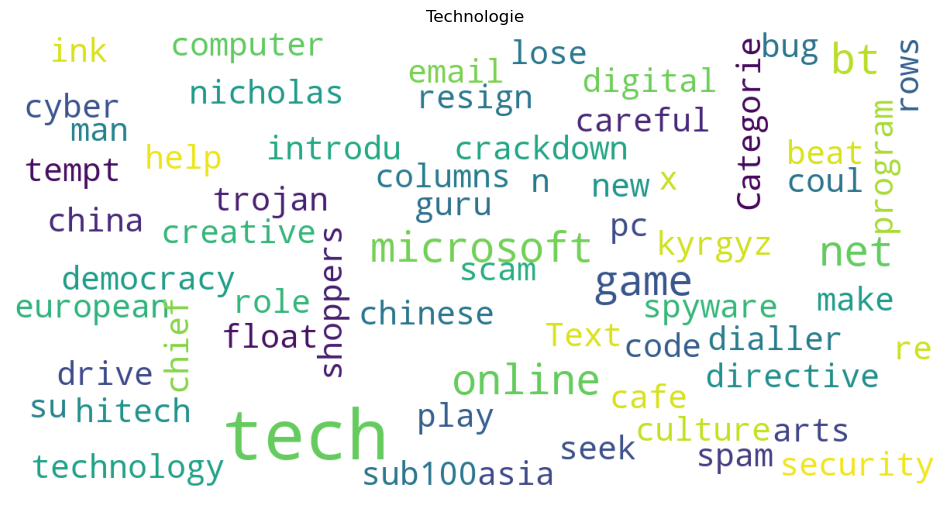

In [11]:
# Word cloud (Nuage des mots)

#!pip install wordcloud

from wordcloud import WordCloud

def show_wordcloud(data, text):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 30,
        scale = 3,
        random_state = 1)

    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize = (12,12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.title(str(text))
    plt.show()

show_wordcloud(data = text_data[text_data["Categorie"] == "business"], text = "Business")
show_wordcloud(data = text_data[text_data["Categorie"] == "entertainment"], text = "Divertissement")
show_wordcloud(data = text_data[text_data["Categorie"] == "politics"], text = "Politique")
show_wordcloud(data = text_data[text_data["Categorie"] == "sport"], text = "Sport")
show_wordcloud(data = text_data[text_data["Categorie"] == "tech"], text = "Technologie")

## Analyse des sentiments

In [12]:
# Conversion des listes de mots-cles en string pour chaque document

for i in text_data.index:
    text_data["Text"][i] = " ".join(text_data.Text[i])

text_data.sample(10, random_state = 12)

,Text,Categorie
1329,call kenteris clear kostas kenteris lawyer cal...,sport
91,iranian mps threaten mobile deal turkeys bigge...,business
733,farrell due make tv debut actor colin farrell ...,entertainment
1430,parry relish anfield challenge bbc sport refle...,sport
784,producers scoop stage award producers beat mar...,entertainment
1849,warn junk mail deluge amount spam circulate on...,tech
2131,microsoft make antipiracy move microsoft say c...,tech
1817,soderling win tense milan final fifth seed rob...,sport
462,economy still grow say feed areas saw economy ...,business
1534,mcclaren hail boros uefa spirit middlesbrough ...,sport


In [13]:
# Sentiment analysis

# L'analyse des sentiments est une technique utilisee en NLP pour determiner la teneur emotionnelle d'un document textuel

#!pip install textblob
#nltk.download("vader_lexicon")
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

text_data[["Polarity", "Subjectivity"]] = text_data["Text"].apply(lambda text: pd.Series(TextBlob(text).sentiment))
for index, row in text_data["Text"].iteritems():
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(row)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    if neg > pos:
        text_data.loc[index, "Sentiment"] = "Negative"
    elif neg < pos:
        text_data.loc[index, "Sentiment"] = "Positive"
    else:
        text_data.loc[index, "Sentiment"] = "Neutral"

display(text_data["Sentiment"].value_counts(normalize = True))
display(text_data)

Positive    0.737528
Negative    0.256629
Neutral     0.005843
Name: Sentiment, dtype: float64

,Text,Categorie,Polarity,Subjectivity,Sentiment
0,ad sales boost time warner profit quarterly pr...,business,0.109667,0.442667,Positive
1,dollar gain greenspan speech dollar hit highes...,business,0.053781,0.337963,Positive
2,yukos unit buyer face loan claim owners embatt...,business,0.072436,0.242949,Positive
3,high fuel price hit bas profit british airways...,business,0.158078,0.427795,Positive
4,pernod takeover talk lift domecq share uk drin...,business,-0.027344,0.295833,Positive
...,...,...,...,...,...
2220,bt program beat dialler scam bt introduce two ...,tech,0.107851,0.354580,Positive
2221,spam email tempt net shoppers computer users a...,tech,0.069048,0.326190,Negative
2222,careful code new european directive could put ...,tech,0.079786,0.382817,Positive
2223,cyber security chief resign man make sure comp...,tech,0.101471,0.326797,Positive


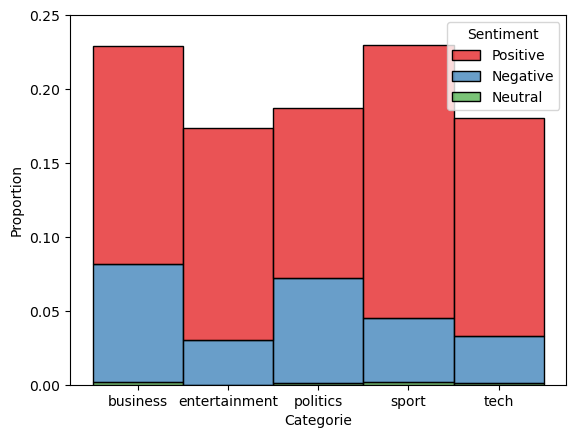

In [14]:
# Sentiment plot

sns.histplot(data=text_data, x="Categorie", stat="proportion", hue="Sentiment", multiple="stack", palette="Set1")
plt.ylim(0,.25);

,Polarity,Subjectivity
Sentiment,,
Negative,0.015695,0.388949
Neutral,0.046439,0.390663
Positive,0.105253,0.392759


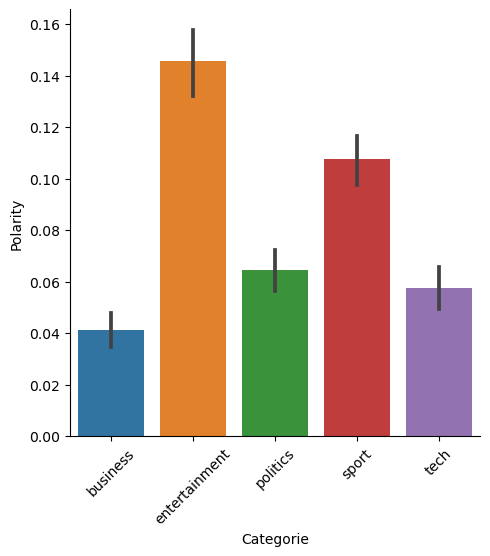

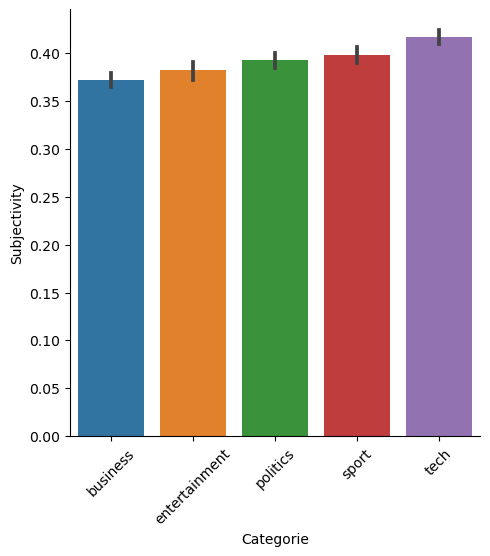

In [15]:
# Polarity vs Subjectivity

display(text_data.groupby("Sentiment").mean())                  # Moyennes des variables numeriques par types de sentiment
sns.catplot(data = text_data, x = "Categorie", y = "Polarity", kind = "bar").set_xticklabels(rotation = 45)
sns.catplot(data = text_data, x = "Categorie", y = "Subjectivity", kind = "bar").set_xticklabels(rotation = 45);

# Text classification

Nous allons à présent travailler sur les données nettoyées afin de procéder aux exercices de prédiction. L'enjeu consiste à prédire la catégorie d'appartenance d'un article de presse sur base de son contenu textuel. Pour ce faire, nous allons faire recours à 3 types de classifieurs : (i) Naive Bayes multinominal, (ii) K-Nearest Neighbors, et (iii) Support Vector Machine. Il s'agit des algorithmes les plus utilisées dans la littérature pour modéliser les données textuelles.

In [16]:
# Chargement des librairies

from sklearn.feature_extraction.text import CountVectorizer             # pour la transformation des donnees textuelles en matrice numerique
from sklearn.model_selection import train_test_split                    # pour le partitionnement des donnees
from sklearn.naive_bayes import MultinomialNB                           # pour l'algorithme Naive Bayes
from sklearn.neighbors import KNeighborsClassifier                      # pour l'algorithme KNN
from sklearn.svm import SVC                                             # pour l'algorithme SVM
from sklearn.model_selection import GridSearchCV, validation_curve      # pour l'optimisation des hyper-parametres
from sklearn.metrics import confusion_matrix, classification_report     # pour le rapport de classification

In [17]:
# Exploration des donnees

display(text_data.info())                                           # presentation du cleaned dataset
display(text_data["Categorie"].value_counts(normalize = True))      # les donnees sont equilibrees
display(text_data.sample(10, random_state = 12))                    # apercu de quelques lignes du dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Text          2225 non-null   object 
 1   Categorie     2225 non-null   object 
 2   Polarity      2225 non-null   float64
 3   Subjectivity  2225 non-null   float64
 4   Sentiment     2225 non-null   object 
dtypes: float64(2), object(3)
memory usage: 87.0+ KB


None

sport            0.229663
business         0.229213
politics         0.187416
tech             0.180225
entertainment    0.173483
Name: Categorie, dtype: float64

,Text,Categorie,Polarity,Subjectivity,Sentiment
1329,call kenteris clear kostas kenteris lawyer cal...,sport,0.009229,0.316873,Negative
91,iranian mps threaten mobile deal turkeys bigge...,business,-0.028160,0.361034,Negative
733,farrell due make tv debut actor colin farrell ...,entertainment,-0.010833,0.287222,Positive
1430,parry relish anfield challenge bbc sport refle...,sport,0.123385,0.523988,Positive
784,producers scoop stage award producers beat mar...,entertainment,0.460940,0.339811,Positive
1849,warn junk mail deluge amount spam circulate on...,tech,-0.044332,0.346002,Negative
2131,microsoft make antipiracy move microsoft say c...,tech,0.134809,0.516656,Positive
1817,soderling win tense milan final fifth seed rob...,sport,0.219167,0.435000,Positive
462,economy still grow say feed areas saw economy ...,business,0.111818,0.434394,Positive
1534,mcclaren hail boros uefa spirit middlesbrough ...,sport,0.290476,0.402679,Positive


In [18]:
# Partitionnement des donnees

X_train, X_test, y_train, y_test = train_test_split(text_data.Text, text_data.Categorie, test_size=.1, random_state=12)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2002,) (223,) (2002,) (223,)


In [19]:
# Vectorisation des donnees textuelles

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print(vectorizer.get_feature_names_out()[::100])            # recuperation de 100 mots contenus dans les articles de presse
print(X_train_vec.shape, X_test_vec.shape)                  # format des matrices d'entrainement et de test apres vectorisation

['00' '102975' '114' '12year' '1440' '160m' '1776s' '1904' '19800' '2014'
 '2277th' '2585m' '2863' '30mph' '349m' '3939m' '43' '480000' '514'
 '564bn' '63' '7000' '77800' '84m' '949m' 'abbotts' 'accidently' 'ad'
 'adults' 'aggressive' 'albacete' 'allergies' 'amateurish' 'analyst'
 'annie' 'antismoking' 'apprehend' 'armagh' 'ashvin' 'atlanta' 'austrias'
 'b52s' 'baikal' 'barbarians' 'battalion' 'beef' 'benings' 'beverly'
 'birmingham' 'blitz' 'bogle' 'borthwick' 'brainwave' 'brightcove'
 'browser' 'bundle' 'buzznet' 'camels' 'capriati' 'cart' 'cazalets' 'cfca'
 'chase' 'chilly' 'circulate' 'cleaners' 'cml' 'colleagues' 'committees'
 'compute' 'conjoin' 'consultations' 'conviction' 'corston' 'courvoisier'
 'crime' 'csas' 'cutprice' 'dancevic' 'deadwood' 'deeply' 'delray'
 'depression' 'deuce' 'digest' 'discernible' 'disquiet' 'documentary'
 'dose' 'dresdner' 'dundee' 'easter' 'edwards' 'electronics' 'emily'
 'energystarved' 'envisage' 'espionage' 'eve' 'exclaim' 'explore'
 'facilitate' '

## Naive Bayes

In [20]:
# Entrainement du modele

hyper_param = {"alpha": np.logspace(0,-9,100)}

Grid_Naive = GridSearchCV(MultinomialNB(), param_grid = hyper_param, cv = 10)
Grid_Naive.fit(X_train_vec, y_train)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.310129...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [21]:
# Valeurs optimales des hyper-parametres

print(Grid_Naive.best_params_)
Grid_Naive.best_score_

{'alpha': 0.1}


0.9810199004975125

In [22]:
# Performance du modele dans l'apprentissage

Naive_model = Grid_Naive.best_estimator_
Naive_model.score(X_train_vec, y_train)

0.9965034965034965

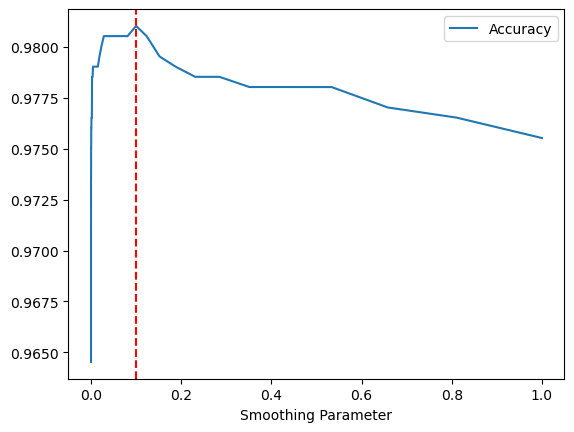

In [23]:
# Visualisation du tunning process (reglage des hyper-parametres)

smooth_param = np.logspace(0,-9,100)
score_train, score_cv = validation_curve(MultinomialNB(), X_train_vec, y_train,
                                         param_name = "alpha", param_range = smooth_param, cv = 10)
score_cv = pd.DataFrame(score_cv.mean(axis = 1), columns = ["Accuracy"])
score_cv.set_index(smooth_param, inplace = True)
score_cv.index.names = ["Smoothing Parameter"]

sns.lineplot(data = score_cv).axvline(score_cv["Accuracy"].idxmax(), color = "red", linestyle = "dashed");

In [24]:
# Rapport de classification et Matrice de confusion

labels = ["business", "entertainment", "politics", "sport", "tech"]

y_predict_naive = Naive_model.predict(X_test_vec)
print(classification_report(y_test, y_predict_naive))
conf_matrix_naive = pd.DataFrame(confusion_matrix(y_test, y_predict_naive), index = labels, columns = labels)
conf_matrix_naive

               precision    recall  f1-score   support

     business       1.00      0.94      0.97        53
entertainment       1.00      1.00      1.00        49
     politics       0.97      1.00      0.98        29
        sport       1.00      1.00      1.00        52
         tech       0.95      1.00      0.98        40

     accuracy                           0.99       223
    macro avg       0.98      0.99      0.99       223
 weighted avg       0.99      0.99      0.99       223



,business,entertainment,politics,sport,tech
business,50,0,1,0,2
entertainment,0,49,0,0,0
politics,0,0,29,0,0
sport,0,0,0,52,0
tech,0,0,0,0,40


In [25]:
# Performance du modele au test

Naive_model.score(X_test_vec, y_test)

0.9865470852017937

## KNN

In [26]:
# Entrainement du modele

warnings.filterwarnings("ignore")

hyper_param = {"n_neighbors": np.arange(2,21),
               "p": np.arange(1,6),
               "weights": ["uniform", "distance"],
               "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
              }

Grid_KNN = GridSearchCV(KNeighborsClassifier(metric = "minkowski"), param_grid = hyper_param, cv=10)
Grid_KNN.fit(X_train_vec, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'p': array([1, 2, 3, 4, 5]),
                         'weights': ['uniform', 'distance']})

In [27]:
# Valeurs optimales des hyper-parametres

print(Grid_KNN.best_params_)
Grid_KNN.best_score_

{'algorithm': 'auto', 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}


0.7382587064676618

In [28]:
# Performance du modele dans l'apprentissage

KNN_model = Grid_KNN.best_estimator_
KNN_model.score(X_train_vec, y_train)

1.0

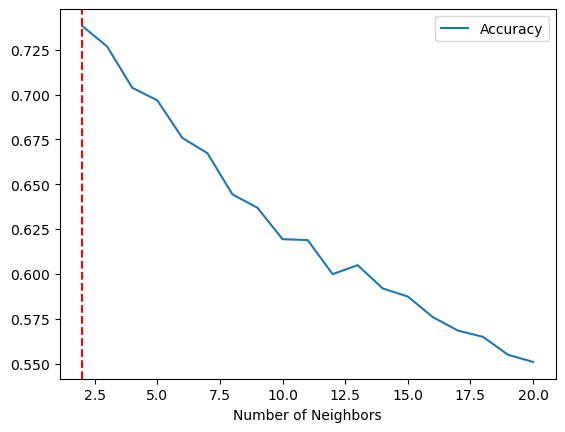

In [29]:
# Visualisation du tunning process (reglage des hyper-parametres)

neighbors = np.arange(2,21)
score_train, score_cv = validation_curve(KNeighborsClassifier(p = 2,
                                                              metric = "minkowski",
                                                              algorithm = "auto",
                                                              weights = "distance"),
                                         X_train_vec, y_train,
                                         param_name = "n_neighbors", param_range = neighbors, cv = 10)
score_cv = pd.DataFrame(score_cv.mean(axis = 1), columns = ["Accuracy"])
score_cv.set_index(neighbors, inplace = True)
score_cv.index.names = ["Number of Neighbors"]

sns.lineplot(data = score_cv).axvline(score_cv["Accuracy"].idxmax(), color = "red", linestyle = "dashed");

In [30]:
# Rapport de classification et Matrice de confusion

labels = ["business", "entertainment", "politics", "sport", "tech"]

y_predict_KNN = KNN_model.predict(X_test_vec)
print(classification_report(y_test, y_predict_KNN))
conf_matrix_KNN = pd.DataFrame(confusion_matrix(y_test, y_predict_KNN), index = labels, columns = labels)
conf_matrix_KNN

               precision    recall  f1-score   support

     business       0.89      0.64      0.75        53
entertainment       1.00      0.53      0.69        49
     politics       0.48      0.76      0.59        29
        sport       0.59      0.92      0.72        52
         tech       1.00      0.78      0.87        40

     accuracy                           0.72       223
    macro avg       0.79      0.73      0.72       223
 weighted avg       0.81      0.72      0.73       223



,business,entertainment,politics,sport,tech
business,34,0,7,12,0
entertainment,1,26,12,10,0
politics,2,0,22,5,0
sport,0,0,4,48,0
tech,1,0,1,7,31


In [31]:
# Performance du modele au test

KNN_model.score(X_test_vec, y_test)

0.7219730941704036

## SVM

In [32]:
# Entrainement du modele

hyper_param = {"C": np.arange(1,6),
               "kernel": ["linear", "poly", "rbf", "sigmoid"]
              }

Grid_SVM = GridSearchCV(SVC(shrinking = True), param_grid = hyper_param, cv = 10)
Grid_SVM.fit(X_train_vec, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4, 5]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [33]:
# Valeurs optimales des hyper-parametres

print(Grid_SVM.best_params_)
Grid_SVM.best_score_

{'C': 1, 'kernel': 'linear'}


0.9710348258706467

In [34]:
# Performance du modele dans l'apprentissage

SVM_model = Grid_SVM.best_estimator_
SVM_model.score(X_train_vec, y_train)

1.0

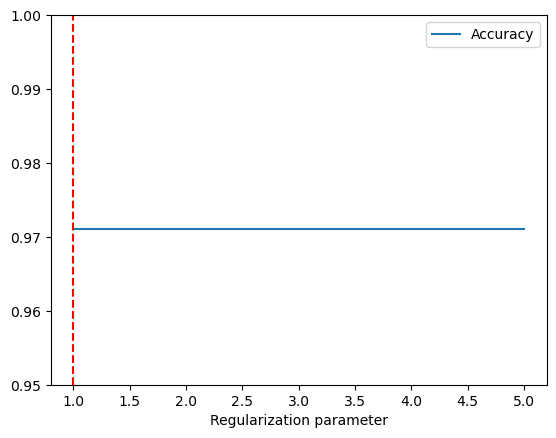

In [35]:
# Visualisation du tunning process (reglage des hyper-parametres)

reg_par = np.arange(1,6)
score_train, score_cv = validation_curve(SVC(shrinking = True,
                                             kernel = "linear"),
                                         X_train_vec, y_train,
                                         param_name = "C", param_range = reg_par, cv = 10)
score_cv = pd.DataFrame(score_cv.mean(axis = 1), columns = ["Accuracy"])
score_cv.set_index(reg_par, inplace = True)
score_cv.index.names = ["Regularization parameter"]

sns.lineplot(data = score_cv).axvline(score_cv["Accuracy"].idxmax(), color = "red", linestyle = "dashed")
plt.ylim(.95,1);

In [36]:
# Rapport de classification et Matrice de confusion

labels = ["business", "entertainment", "politics", "sport", "tech"]

y_predict_SVM = SVM_model.predict(X_test_vec)
print(classification_report(y_test, y_predict_SVM))
conf_matrix_SVM = pd.DataFrame(confusion_matrix(y_test, y_predict_SVM), index = labels, columns = labels)
conf_matrix_SVM

               precision    recall  f1-score   support

     business       0.96      0.96      0.96        53
entertainment       1.00      0.96      0.98        49
     politics       0.93      0.97      0.95        29
        sport       0.98      1.00      0.99        52
         tech       0.97      0.97      0.97        40

     accuracy                           0.97       223
    macro avg       0.97      0.97      0.97       223
 weighted avg       0.97      0.97      0.97       223



,business,entertainment,politics,sport,tech
business,51,0,1,0,1
entertainment,1,47,1,0,0
politics,1,0,28,0,0
sport,0,0,0,52,0
tech,0,0,0,1,39


In [37]:
# Performance du modele au test

SVM_model.score(X_test_vec, y_test)

0.9730941704035875

## Fonction de prediction

In [38]:
# Comparaison des methodes de classification

classification_method = pd.DataFrame({"Naive Bayes": [Grid_Naive.best_score_,
                                                      Naive_model.score(X_train_vec, y_train),
                                                      Naive_model.score(X_test_vec, y_test)],
                                      "KNN": [Grid_KNN.best_score_,
                                              KNN_model.score(X_train_vec, y_train),
                                              KNN_model.score(X_test_vec, y_test)],
                                      "SVM": [Grid_SVM.best_score_,
                                              SVM_model.score(X_train_vec, y_train),
                                              SVM_model.score(X_test_vec, y_test)]
                                    },
                                      index = ["Validation Score", "Train Score", "Test Score"])
classification_method.loc["Hyper-parameters"] = [Grid_Naive.best_params_, Grid_KNN.best_params_, Grid_SVM.best_params_]
classification_method

,Naive Bayes,KNN,SVM
Validation Score,0.98102,0.738259,0.971035
Train Score,0.996503,1.0,1.0
Test Score,0.986547,0.721973,0.973094
Hyper-parameters,{'alpha': 0.1},"{'algorithm': 'auto', 'n_neighbors': 2, 'p': 2...","{'C': 1, 'kernel': 'linear'}"


In [39]:
# Creation d'une fonction de prediction

def predict_category(text, model):
    prediction = model.predict(vectorizer.transform([text]))
    return prediction[0]

In [40]:
# Test sur des exemples nouveaux

news1 = "TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. \nFor the full-year, TimeWarner posted a profit of $3.36bn, up 27\%\ from its 2003 performance, while revenues grew 6.4% to $42.09bn. \nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier. \nHowever, the company said AOL's underlying profit before exceptional items rose 8\%\ on the back of stronger internet advertising revenues. \nIts profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL. \nFor 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins. \nIt lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. \nTime Warner's fourth quarter profits were slightly better than analysts' expectations."
news2 = "The messages will be \"unwrapped\" by sculptor Richard Wentworth, who is responsible for decorating the tree with broken plates and light bulbs. \nA Christmas tree that can receive text messages has been unveiled at London's Tate Britain art gallery. \nIt is the 17th year that the gallery has invited an artist to dress their Christmas tree. \nThe spruce has an antenna which can receive Bluetooth texts sent by visitors to the Tate. \nHis reputation as a sculptor grew in the 1980s, while he has been one of the most influential teachers during the last two decades."
news3 = "The Labor Party will hold its 2006 autumn conference in Manchester and not Blackpool, it has been confirmed. \nFor years the main political parties have rotated between Blackpool, Bournemouth and Brighton. \nIn 1998 the party said it would not return to Blackpool but did so in 2002. \nAnd the news the much larger annual conference is not to gather in Blackpool will be seen as a blow in the coastal resort. \nColin Asplin, Blackpool Hotel Association said: \"We have tried very hard to make sure they come back to Blackpool.\" \nIt will be the first time since 1917 that the party has chosen Manchester to host the annual event."
news4 = "For the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. \nClaxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. \nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid. \nClaxton will see if her new training regime pays dividends at the European Indoors which take place on 5-6 March. \"I am quite confident,\" said Claxton."
news5 = "Laws on net cafe opening hours and who can use them were introduced in 2002 following a fire at one cafe that killed 25 people. \nChinese authorities closed 12,575 net cafes in the closing months of 2004, the country's government said. \nChina has long been worried that net cafes are an unhealthy influence on young people. \nThis is not the first time that the Chinese government has moved against net cafes that are not operating within its strict guidelines. \nThe hours that children can use net cafes are also tightly regulated. \nAccording to the official news agency most of the net cafes were closed down because they were operating illegally. \nIn August 2004 Chinese authorities shut down 700 websites and arrested 224 people in a crackdown on net porn. \nNet cafes are hugely popular in China because the relatively high cost of computer hardware means that few people have PCs in their homes."

print("NEWS 1" + "\n" + news1 + "\n \n" +
      "NEWS 2" + "\n" + news2 + "\n \n" +
      "NEWS 3" + "\n" + news3 + "\n \n" +
      "NEWS 4" + "\n" + news4 + "\n \n" +
      "NEWS 5" + "\n" + news5)

NEWS 1
TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. 
For the full-year, TimeWarner posted a profit of $3.36bn, up 27\%\ from its 2003 performance, while revenues grew 6.4% to $42.09bn. 
Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier. 
However, the company said AOL's underlying profit before exceptional items rose 8\%\ on the back of stronger internet advertising revenues. 
Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL. 
For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins. 
It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. 
Time Warner's fourth quarter profits were slightly better than analysts' expectations.
 
NEWS 2
The messages will be "unwrapped" by sculptor Richard Wentworth, w

In [41]:
# Model 1 : NB

print("Exemple 1 :", predict_category(text = news1, model = Naive_model))
print("Exemple 2 :", predict_category(text = news2, model = Naive_model))
print("Exemple 3 :", predict_category(text = news3, model = Naive_model))
print("Exemple 4 :", predict_category(text = news4, model = Naive_model))
print("Exemple 5 :", predict_category(text = news5, model = Naive_model))


Exemple 1 : business
Exemple 2 : entertainment
Exemple 3 : politics
Exemple 4 : sport
Exemple 5 : tech


In [42]:
# Model 2 : KNN

print("Exemple 1 :", predict_category(text = news1, model = KNN_model))
print("Exemple 2 :", predict_category(text = news2, model = KNN_model))
print("Exemple 3 :", predict_category(text = news3, model = KNN_model))
print("Exemple 4 :", predict_category(text = news4, model = KNN_model))
print("Exemple 5 :", predict_category(text = news5, model = KNN_model))

Exemple 1 : politics
Exemple 2 : entertainment
Exemple 3 : politics
Exemple 4 : sport
Exemple 5 : politics


In [43]:
# Model 3 : SVM

print("Exemple 1 :", predict_category(text = news1, model = SVM_model))
print("Exemple 2 :", predict_category(text = news2, model = SVM_model))
print("Exemple 3 :", predict_category(text = news3, model = SVM_model))
print("Exemple 4 :", predict_category(text = news4, model = SVM_model))
print("Exemple 5 :", predict_category(text = news5, model = SVM_model))

Exemple 1 : business
Exemple 2 : entertainment
Exemple 3 : politics
Exemple 4 : sport
Exemple 5 : tech
